<a href="https://colab.research.google.com/github/reza-pishva/RNN-projects/blob/main/clustering_lube_oil_g11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.losses import mse
from sklearn.decomposition import PCA
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
import warnings # Ignore specific warnings
warnings.filterwarnings("ignore")

In [21]:
df1 = pd.read_excel('output_lube_oil_g11.xlsx')

In [22]:
df1.head(10)

AssetID_8341  AssetID_8342  AssetID_8343  AssetID_8344  AssetID_8346  \
0          0.23         12.30          66.0        -205.0           7.9   
1          0.21         12.30          63.0        -205.0           7.9   
2          0.21         12.30          62.0        -205.0           0.0   
3          0.25         12.30          61.0        -200.0           7.8   
4          0.23         12.30          58.0        -205.0           7.8   
5          0.21         12.30          62.0        -205.0           7.8   
6          0.21         12.30          62.0        -205.0           7.8   
7          0.23          0.23          64.0        -240.0           8.0   
8           NaN           NaN          62.0        -210.0           8.0   
9          0.23           NaN          65.0        -210.0           7.8   

   AssetID_9286  AssetID_9287                date  
0           NaN           NaN 2021-03-17 09:16:14  
1           8.0          1.45 2021-03-18 08:44:03  
2           8.1          1.38 2021-03-19 09:01:53  
3           8.0          1.38 2021-03-20 17:49:02  
4           8.1          1.38 2021-03-20 20:05:58  
5           8.1          1.38 2021-03-20 22:43:37  
6           8.1          1.38 2021-03-21 02:05:28  
7           NaN           NaN 2021-03-21 05:17:54  
8           NaN           NaN 2021-03-21 08:10:07  
9           NaN           NaN 2021-03-21 10:45:51

In [23]:
df1.columns

Index(['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287', 'date'],
      dtype='object')

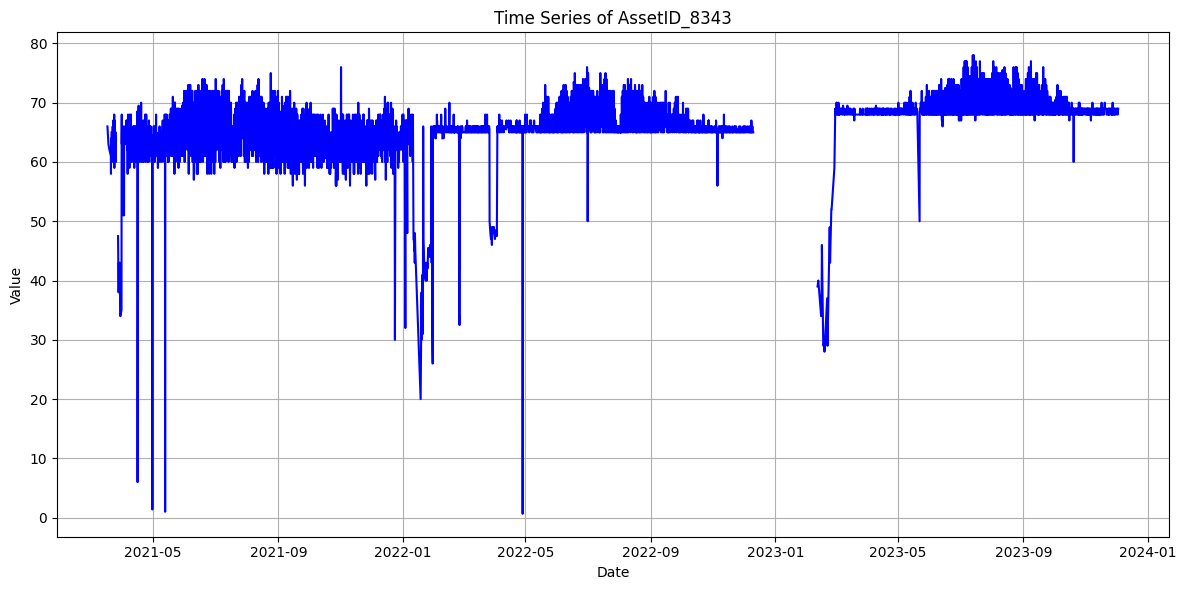

In [24]:
# ÿ™ÿ®ÿØ€åŸÑ ÿ≥ÿ™ŸàŸÜ ÿ™ÿßÿ±€åÿÆ ÿ®Ÿá datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿ®ÿ±ÿß€å AssetID_8343
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['AssetID_8343'], color='blue')
plt.title('Time Series of AssetID_8343')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

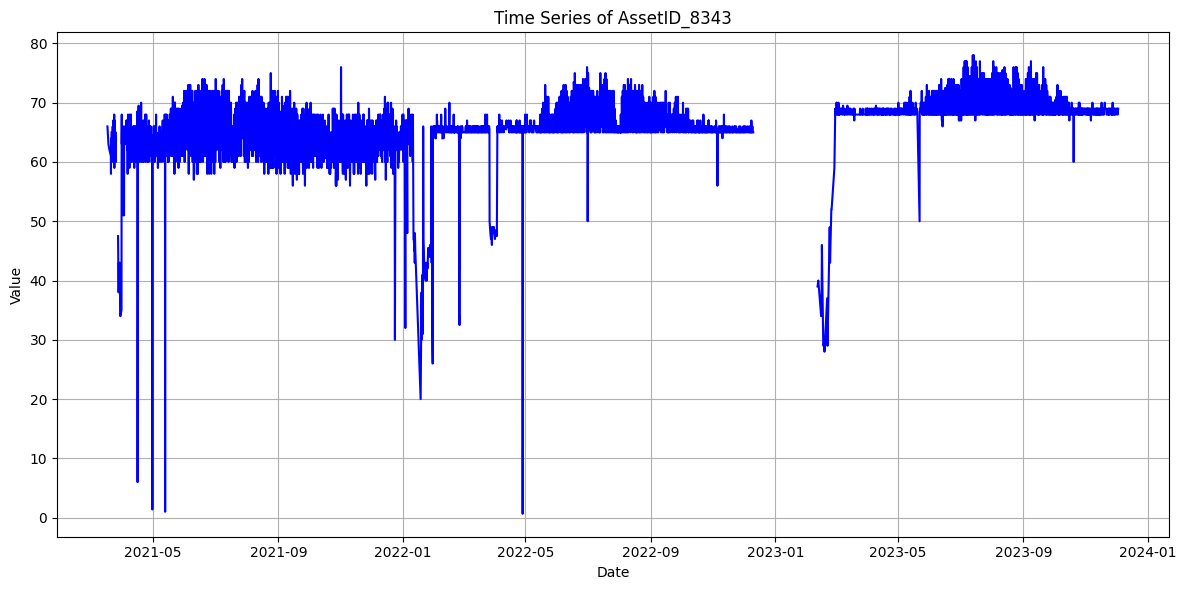

In [25]:
# ÿ™ÿ®ÿØ€åŸÑ ÿ≥ÿ™ŸàŸÜ ÿ™ÿßÿ±€åÿÆ ÿ®Ÿá datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿ®ÿ±ÿß€å AssetID_8312
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['AssetID_8343'], color='blue')
plt.title('Time Series of AssetID_8343')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

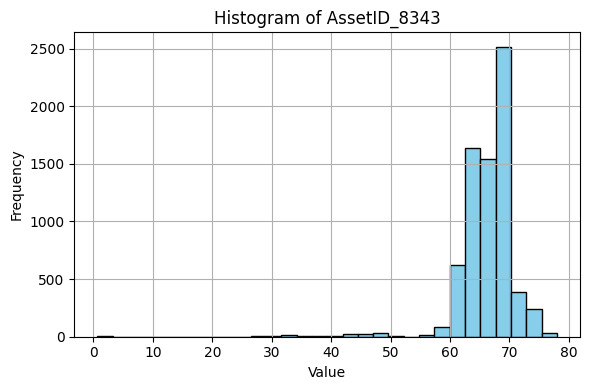

In [26]:
# ÿ±ÿ≥ŸÖ Ÿá€åÿ≥ÿ™Ÿà⁄Øÿ±ÿßŸÖ ÿ®ÿ±ÿß€å AssetID_8343
plt.figure(figsize=(6, 4))
plt.hist(df1['AssetID_8343'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of AssetID_8343')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
from sklearn.preprocessing import StandardScaler

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ≥ÿßÿ≤€å
data_to_scale = df1[['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287']]

# ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# ÿ™ÿ®ÿØ€åŸÑ ÿÆÿ±Ÿàÿ¨€å ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿ®ÿß ŸáŸÖÿßŸÜ ŸÜÿßŸÖ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß
scaled_df = pd.DataFrame(scaled_data, columns=['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287'])

# ŸÜŸÖÿß€åÿ¥ €µ ÿ±ÿØ€åŸÅ ÿßŸàŸÑ
print(scaled_df.head())


   AssetID_8341  AssetID_8342  AssetID_8343  AssetID_8344  AssetID_8346  \
0      0.484130      0.469185     -0.038876      1.153648      0.398220   
1      0.277089      0.469185     -0.652971      1.153648      0.398220   
2      0.277089      0.469185     -0.857669      1.153648     -5.338017   
3      0.691171      0.469185     -1.062368      1.409066      0.325609   
4      0.484130      0.469185     -1.676463      1.153648      0.325609   

   AssetID_9286  AssetID_9287  
0           NaN           NaN  
1      0.127800      0.023640  
2      0.168002     -0.004419  
3      0.127800     -0.004419  
4      0.168002     -0.004419  


In [28]:
scaled_df_clean = scaled_df.dropna()

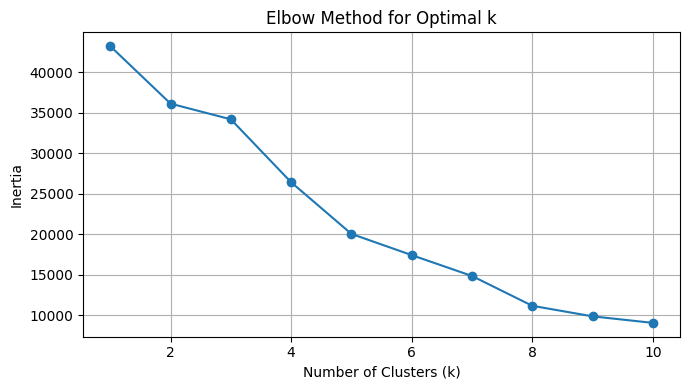

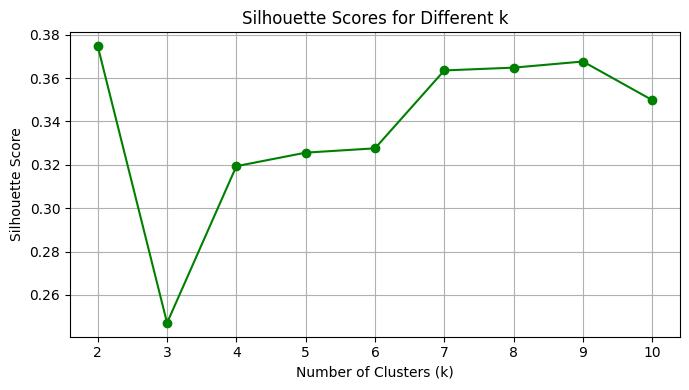

In [29]:
X = scaled_df_clean[['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287']]

# Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Silhouette Scores
silhouette_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7, 4))
plt.plot(k_range_sil, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


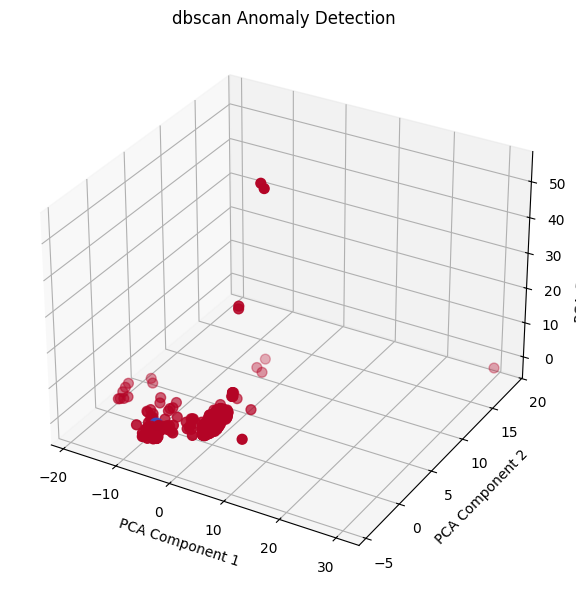

In [30]:
# ÿßÿ¨ÿ±ÿß€å DBSCAN ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
dbscan = DBSCAN(eps=0.7, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ≥Ÿá ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å LOF ÿØÿ± ŸÅÿ∂ÿß€å ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('dbscan Anomaly Detection')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()


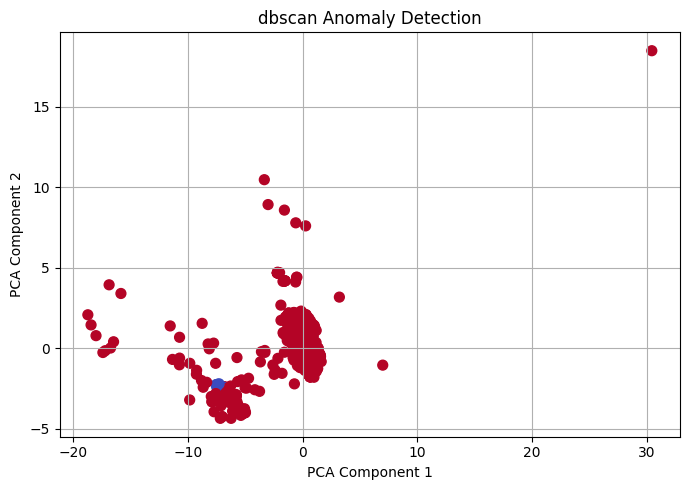

In [31]:
# ÿßÿ¨ÿ±ÿß€å DBSCAN ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
dbscan = DBSCAN(eps=0.7, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿØŸà ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å LOF
plt.figure(figsize=(7, 5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)
plt.title('dbscan Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
import numpy as np

num_abnormal = np.sum(labels == -1)
num_total = len(labels)
print(f"ÿØÿ±ÿµÿØ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å‚ÄåŸáÿß: {100 * num_abnormal / num_total:.2f}%")


ÿØÿ±ÿµÿØ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å‚ÄåŸáÿß: 1.29%


In [33]:
import pandas as pd

# ÿ≥ÿßÿÆÿ™ €å⁄© ÿ≥ÿ±€å ÿßÿ≤ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å ÿÆŸàÿ¥Ÿá
cluster_series = pd.Series(labels)

# ÿ¥ŸÖÿßÿ±ÿ¥ ÿ™ÿπÿØÿßÿØ ÿßÿπÿ∂ÿß€å Ÿáÿ± ÿÆŸàÿ¥Ÿá
cluster_counts = cluster_series.value_counts().sort_index()

# ŸÜŸÖÿß€åÿ¥ ŸÜÿ™ÿß€åÿ¨
print("ÿ™ÿπÿØÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿØÿ± Ÿáÿ± ÿÆŸàÿ¥Ÿá:")
for cluster_id, count in cluster_counts.items():
    label = f"Cluster {cluster_id}" if cluster_id != -1 else "Noise (abnormal)"
    print(f"{label}: {count} ŸÖŸàÿ±ÿØ")


ÿ™ÿπÿØÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿØÿ± Ÿáÿ± ÿÆŸàÿ¥Ÿá:
Noise (abnormal): 93 ŸÖŸàÿ±ÿØ
Cluster 0: 7017 ŸÖŸàÿ±ÿØ
Cluster 1: 6 ŸÖŸàÿ±ÿØ
Cluster 2: 10 ŸÖŸàÿ±ÿØ
Cluster 3: 33 ŸÖŸàÿ±ÿØ
Cluster 4: 17 ŸÖŸàÿ±ÿØ
Cluster 5: 17 ŸÖŸàÿ±ÿØ
Cluster 6: 7 ŸÖŸàÿ±ÿØ
Cluster 7: 7 ŸÖŸàÿ±ÿØ


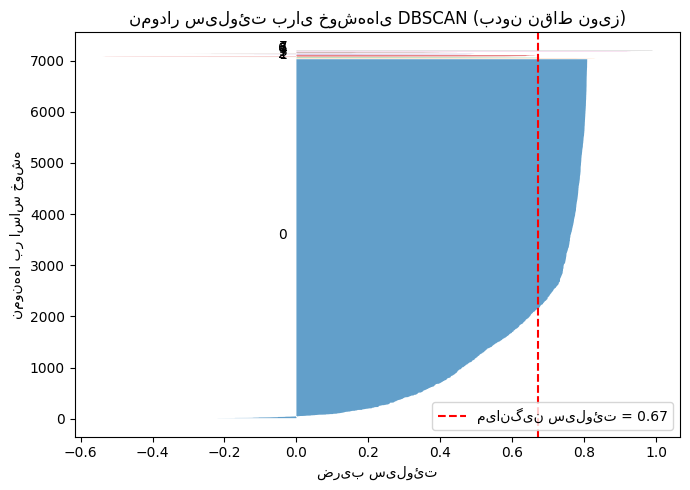

In [34]:
# ÿßÿ¨ÿ±ÿß€å DBSCAN ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
dbscan = DBSCAN(eps=0.7, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿ®ÿß PCA ÿ®ÿ±ÿß€å ŸÜŸÖÿß€åÿ¥ Ÿà ÿ™ÿ≠ŸÑ€åŸÑ
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# ŸÅ€åŸÑÿ™ÿ± ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÜÿ±ŸÖÿßŸÑ (ÿ®ÿ±⁄Üÿ≥ÿ® ‚â† -1)
mask = labels != -1
pca_filtered = pca_result[mask]
labels_filtered = labels[mask]

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ŸÜŸÖÿ±ÿßÿ™ ÿ≥€åŸÑŸàÿ¶ÿ™
silhouette_vals = silhouette_samples(pca_filtered, labels_filtered)
silhouette_avg = silhouette_score(pca_filtered, labels_filtered)

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿ≥€åŸÑŸàÿ¶ÿ™
plt.figure(figsize=(7, 5))
y_lower = 10
for i in np.unique(labels_filtered):
    ith_cluster_silhouette_vals = silhouette_vals[labels_filtered == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_vals,
        alpha=0.7
    )
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ≥€åŸÑŸàÿ¶ÿ™ = {silhouette_avg:.2f}")
plt.xlabel("ÿ∂ÿ±€åÿ® ÿ≥€åŸÑŸàÿ¶ÿ™")
plt.ylabel("ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿÆŸàÿ¥Ÿá")
plt.title("ŸÜŸÖŸàÿØÿßÿ± ÿ≥€åŸÑŸàÿ¶ÿ™ ÿ®ÿ±ÿß€å ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß€å DBSCAN (ÿ®ÿØŸàŸÜ ŸÜŸÇÿßÿ∑ ŸÜŸà€åÿ≤)")
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

best_score = -1
best_params = None

for eps in [0.3, 0.5, 0.7, 0.9]:
    for min_samples in [3, 4, 5, 6]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(scaled_df_clean)

        # ŸÅŸÇÿ∑ ŸÜŸÇÿßÿ∑ ŸÜÿ±ŸÖÿßŸÑ ÿ±ÿß ÿ®ÿ±ÿß€å ÿ≥€åŸÑŸàÿ¶ÿ™ ÿØÿ± ŸÜÿ∏ÿ± ÿ®⁄Ø€åÿ±
        mask = labels != -1
        if len(set(labels[mask])) > 1:
            score = silhouette_score(scaled_df_clean[mask], labels[mask])
            print(f"eps={eps}, min_samples={min_samples} ‚Üí silhouette={score:.3f}")
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"\n‚úÖ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ™ÿ±⁄©€åÿ®: eps={best_params[0]}, min_samples={best_params[1]} ÿ®ÿß ŸÜŸÖÿ±Ÿá ÿ≥€åŸÑŸàÿ¶ÿ™ {best_score:.3f}")


eps=0.3, min_samples=3 ‚Üí silhouette=-0.191
eps=0.3, min_samples=4 ‚Üí silhouette=-0.152
eps=0.3, min_samples=5 ‚Üí silhouette=-0.108
eps=0.3, min_samples=6 ‚Üí silhouette=-0.106
eps=0.5, min_samples=3 ‚Üí silhouette=-0.241
eps=0.5, min_samples=4 ‚Üí silhouette=-0.234
eps=0.5, min_samples=5 ‚Üí silhouette=-0.125
eps=0.5, min_samples=6 ‚Üí silhouette=-0.129
eps=0.7, min_samples=3 ‚Üí silhouette=0.143
eps=0.7, min_samples=4 ‚Üí silhouette=0.704
eps=0.7, min_samples=5 ‚Üí silhouette=0.704
eps=0.7, min_samples=6 ‚Üí silhouette=0.704
eps=0.9, min_samples=3 ‚Üí silhouette=0.143
eps=0.9, min_samples=4 ‚Üí silhouette=0.703
eps=0.9, min_samples=5 ‚Üí silhouette=0.703
eps=0.9, min_samples=6 ‚Üí silhouette=0.704

‚úÖ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ™ÿ±⁄©€åÿ®: eps=0.7, min_samples=6 ÿ®ÿß ŸÜŸÖÿ±Ÿá ÿ≥€åŸÑŸàÿ¶ÿ™ 0.704


In [36]:
# ÿßÿ¨ÿ±ÿß€å DBSCAN ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
dbscan = DBSCAN(eps=0.7, min_samples=6) # Using the best params found earlier
labels = dbscan.fit_predict(scaled_df_clean)

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ÿÆŸàÿ¥Ÿá ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
scaled_df_clean['dbscan_label'] = labels

# ÿßŸÅÿ≤ŸàÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® DBSCAN ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿß€åŸÜÿØ⁄©ÿ≥
df1 = df1.merge(scaled_df_clean[['dbscan_label']], left_index=True, right_index=True, how='left')

# ŸÅ€åŸÑÿ™ÿ± ⁄©ÿ±ÿØŸÜ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ (ÿ®ÿ±⁄Üÿ≥ÿ® -1)
abnormal_df = df1[df1['dbscan_label'] == -1]

# ÿßŸÜÿ™ÿÆÿßÿ® €±€∞ ŸÜŸÖŸàŸÜŸá ÿ™ÿµÿßÿØŸÅ€å ÿßÿ≤ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
abnormal_sample = abnormal_df.sample(n=10, random_state=42).reset_index(drop=True)

# ŸÜŸÖÿß€åÿ¥ ÿ¨ÿØŸàŸÑ ŸÜŸáÿß€å€å
print("üîç €±€∞ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ ÿ¥ŸÜÿßÿ≥ÿß€å€å‚Äåÿ¥ÿØŸá ÿ™Ÿàÿ≥ÿ∑ DBSCAN (ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å):")
print(abnormal_sample)

üîç €±€∞ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ ÿ¥ŸÜÿßÿ≥ÿß€å€å‚Äåÿ¥ÿØŸá ÿ™Ÿàÿ≥ÿ∑ DBSCAN (ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å):
   AssetID_8341  AssetID_8342  AssetID_8343  AssetID_8344  AssetID_8346  \
0          0.14          11.0          65.0        -250.0           7.6   
1          0.25          12.2          64.0        -200.0           7.8   
2          0.10          11.4          34.0        -260.0           0.0   
3          0.55           0.0          30.0        -180.0           0.0   
4          0.21          12.3          62.0        -205.0           0.0   
5          0.25          12.0          64.0        -200.0           7.8   
6          0.27          12.0          48.0        -250.0           7.7   
7          0.50           0.0          34.0        -200.0           0.0   
8          0.20          11.9          51.0        -240.0           0.0   
9          0.28          11.6          33.0        -260.0           0.0   

   AssetID_9286  AssetID_9287            

In [37]:
from sklearn.cluster import DBSCAN
import pandas as pd

# ÿßÿ¨ÿ±ÿß€å DBSCAN ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
dbscan = DBSCAN(eps=0.7, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# ÿßŸÅÿ≤ŸàÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ÿÆŸàÿ¥Ÿá ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
scaled_df_clean['dbscan_label'] = labels

# ÿßŸÅÿ≤ŸàÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® DBSCAN ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿß€åŸÜÿØ⁄©ÿ≥
df1 = df1.merge(scaled_df_clean[['dbscan_label']], left_index=True, right_index=True, how='left', suffixes=('', '_y'))

# ÿ≠ÿ∞ŸÅ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å ÿØÿ± ÿµŸàÿ±ÿ™ Ÿàÿ¨ŸàÿØ
df1 = df1.loc[:, ~df1.columns.duplicated()]

# ŸÅ€åŸÑÿ™ÿ± ⁄©ÿ±ÿØŸÜ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ (ÿ®ÿ±⁄Üÿ≥ÿ® -1)
abnormal_df = df1[df1['dbscan_label'] == -1]

# ÿßŸÜÿ™ÿÆÿßÿ® €±€∞ ŸÜŸÖŸàŸÜŸá ÿ™ÿµÿßÿØŸÅ€å ÿßÿ≤ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
abnormal_sample = abnormal_df.sample(n=10, random_state=42).reset_index(drop=True)

# ÿ≠ÿ∞ŸÅ ÿ≥ÿ™ŸàŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® DBSCAN
abnormal_sample = abnormal_sample.drop(columns=['dbscan_label'])

# ŸÜŸÖÿß€åÿ¥ ÿ¨ÿØŸàŸÑ ŸÜŸáÿß€å€å ÿ®Ÿá‚ÄåÿµŸàÿ±ÿ™ €å⁄©Ÿæÿßÿ±⁄ÜŸá
pd.set_option('display.max_columns', None)  # ŸÜŸÖÿß€åÿ¥ ÿ™ŸÖÿßŸÖ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß
pd.set_option('display.width', None)        # ÿ¨ŸÑŸà⁄Ø€åÿ±€å ÿßÿ≤ ÿ¥⁄©ÿ≥ÿ™ŸÜ ÿÆÿ∑Ÿàÿ∑
print("üîç €±€∞ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ ÿ¥ŸÜÿßÿ≥ÿß€å€å‚Äåÿ¥ÿØŸá ÿ™Ÿàÿ≥ÿ∑ DBSCAN (ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å):")
print(abnormal_sample)


üîç €±€∞ ŸÜŸÖŸàŸÜŸá ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ ÿ¥ŸÜÿßÿ≥ÿß€å€å‚Äåÿ¥ÿØŸá ÿ™Ÿàÿ≥ÿ∑ DBSCAN (ÿ®ÿß ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å):
   AssetID_8341  AssetID_8342  AssetID_8343  AssetID_8344  AssetID_8346  \
0          0.14          11.0          65.0        -250.0           7.6   
1          0.25          12.2          64.0        -200.0           7.8   
2          0.10          11.4          34.0        -260.0           0.0   
3          0.55           0.0          30.0        -180.0           0.0   
4          0.21          12.3          62.0        -205.0           0.0   
5          0.25          12.0          64.0        -200.0           7.8   
6          0.27          12.0          48.0        -250.0           7.7   
7          0.50           0.0          34.0        -200.0           0.0   
8          0.20          11.9          51.0        -240.0           0.0   
9          0.28          11.6          33.0        -260.0           0.0   

   AssetID_9286  AssetID_9287            

In [38]:
# ÿ™ÿ®ÿØ€åŸÑ ÿ¨ÿØŸàŸÑ ÿ®Ÿá HTML
html_output = abnormal_sample.to_html(index=False, border=1, justify='center')

# ŸÜŸÖÿß€åÿ¥ HTML ÿØÿ± ÿÆÿ±Ÿàÿ¨€å
print("üîç ÿÆÿ±Ÿàÿ¨€å HTML ÿ¨ÿØŸàŸÑ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ:")
print(html_output)


üîç ÿÆÿ±Ÿàÿ¨€å HTML ÿ¨ÿØŸàŸÑ ŸÜŸÖŸàŸÜŸá‚ÄåŸáÿß€å ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: center;">
      <th>AssetID_8341</th>
      <th>AssetID_8342</th>
      <th>AssetID_8343</th>
      <th>AssetID_8344</th>
      <th>AssetID_8346</th>
      <th>AssetID_9286</th>
      <th>AssetID_9287</th>
      <th>date</th>
      <th>dbscan_label_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0.14</td>
      <td>11.0</td>
      <td>65.0</td>
      <td>-250.0</td>
      <td>7.6</td>
      <td>8.0</td>
      <td>1.34</td>
      <td>2022-01-07 16:47:32</td>
      <td>-1.0</td>
    </tr>
    <tr>
      <td>0.25</td>
      <td>12.2</td>
      <td>64.0</td>
      <td>-200.0</td>
      <td>7.8</td>
      <td>8.0</td>
      <td>66.00</td>
      <td>2021-06-18 01:22:27</td>
      <td>-1.0</td>
    </tr>
    <tr>
      <td>0.10</td>
      <td>11.4</td>
      <td>34.0</td>
      <td>-260.0</td>
      <td>0.0</td>
      <td>7.9</td>
      <td>1.6

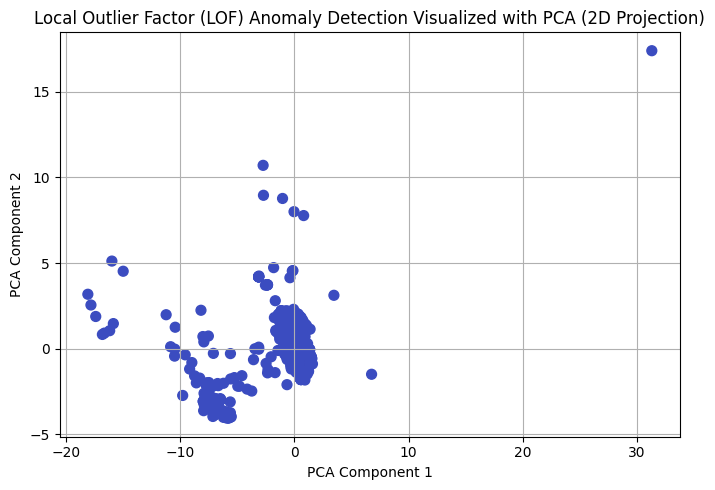

In [39]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ÿßÿ¨ÿ±ÿß€å LOF ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.01)
labels = lof.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿØŸà ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å LOF
plt.figure(figsize=(7, 5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)
plt.title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


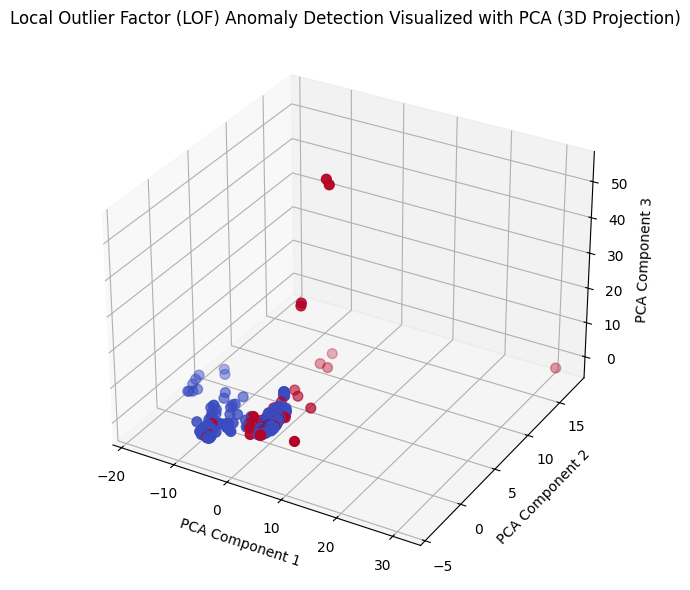

In [42]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ÿßÿ¨ÿ±ÿß€å LOF ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
labels = lof.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ≥Ÿá ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å LOF ÿØÿ± ŸÅÿ∂ÿß€å ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()


In [41]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

best_ratio = -1
best_params = None

for contamination in [0.01, 0.03, 0.05, 0.1]:
    for n_neighbors in [10, 15, 20, 25]:
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
        labels = lof.fit_predict(scaled_df_clean)

        # ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿØÿ±ÿµÿØ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å‚ÄåŸáÿß
        num_abnormal = np.sum(labels == -1)
        ratio = num_abnormal / len(labels)

        print(f"n_neighbors={n_neighbors}, contamination={contamination} ‚Üí abnormal ratio={ratio:.3f}")

        # ÿßŸÜÿ™ÿÆÿßÿ® ÿ™ÿ±⁄©€åÿ®€å ⁄©Ÿá ÿ®€åÿ¥ÿ™ÿ±€åŸÜ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å ŸÖŸÜÿ∑ŸÇ€å ÿ±ÿß ÿ¥ŸÜÿßÿ≥ÿß€å€å ⁄©ŸÜÿØ
        if ratio > best_ratio and ratio < 0.2:  # ŸÖÿ≠ÿØŸàÿØ ⁄©ÿ±ÿØŸÜ ÿ®Ÿá ÿØÿ±ÿµÿØŸáÿß€å ŸÖŸÜÿ∑ŸÇ€å
            best_ratio = ratio
            best_params = (n_neighbors, contamination)

print(f"\n‚úÖ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ™ÿ±⁄©€åÿ®: n_neighbors={best_params[0]}, contamination={best_params[1]} ÿ®ÿß ŸÜÿ≥ÿ®ÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å {best_ratio:.3f}")


n_neighbors=10, contamination=0.01 ‚Üí abnormal ratio=0.010
n_neighbors=15, contamination=0.01 ‚Üí abnormal ratio=0.009
n_neighbors=20, contamination=0.01 ‚Üí abnormal ratio=0.010
n_neighbors=25, contamination=0.01 ‚Üí abnormal ratio=0.010
n_neighbors=10, contamination=0.03 ‚Üí abnormal ratio=0.030
n_neighbors=15, contamination=0.03 ‚Üí abnormal ratio=0.030
n_neighbors=20, contamination=0.03 ‚Üí abnormal ratio=0.030
n_neighbors=25, contamination=0.03 ‚Üí abnormal ratio=0.030
n_neighbors=10, contamination=0.05 ‚Üí abnormal ratio=0.050
n_neighbors=15, contamination=0.05 ‚Üí abnormal ratio=0.050
n_neighbors=20, contamination=0.05 ‚Üí abnormal ratio=0.050
n_neighbors=25, contamination=0.05 ‚Üí abnormal ratio=0.050
n_neighbors=10, contamination=0.1 ‚Üí abnormal ratio=0.100
n_neighbors=15, contamination=0.1 ‚Üí abnormal ratio=0.100
n_neighbors=20, contamination=0.1 ‚Üí abnormal ratio=0.100
n_neighbors=25, contamination=0.1 ‚Üí abnormal ratio=0.100

‚úÖ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ™ÿ±⁄©€åÿ®: n_neighbors=10

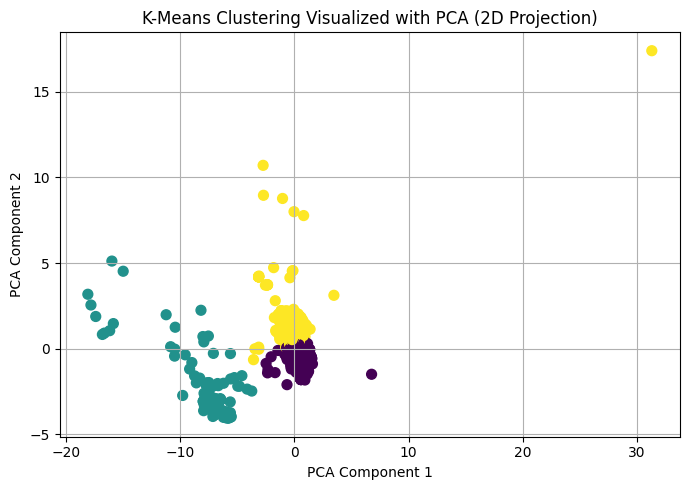

In [43]:
# ÿßÿ¨ÿ±ÿß€å K-Means ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿØŸà ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å K-Means
plt.figure(figsize=(7, 5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=labels,
    cmap='viridis',
    s=50
)
plt.title('K-Means Clustering Visualized with PCA (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


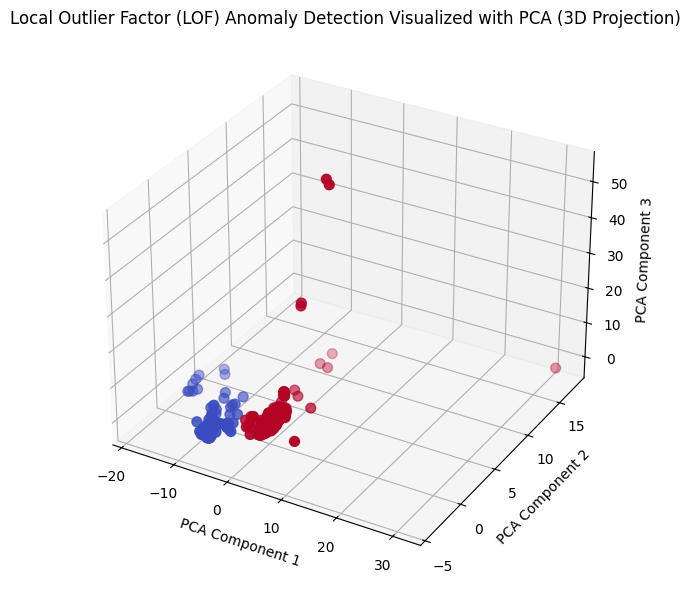

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ÿßÿ¨ÿ±ÿß€å ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ÿ™ÿ¨ŸÖÿπ€å ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')  # ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ŸÇÿßÿ®ŸÑ ÿ™ŸÜÿ∏€åŸÖ ÿßÿ≥ÿ™
cluster_labels = agglo.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ≥Ÿá ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å LOF ÿØÿ± ŸÅÿ∂ÿß€å ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



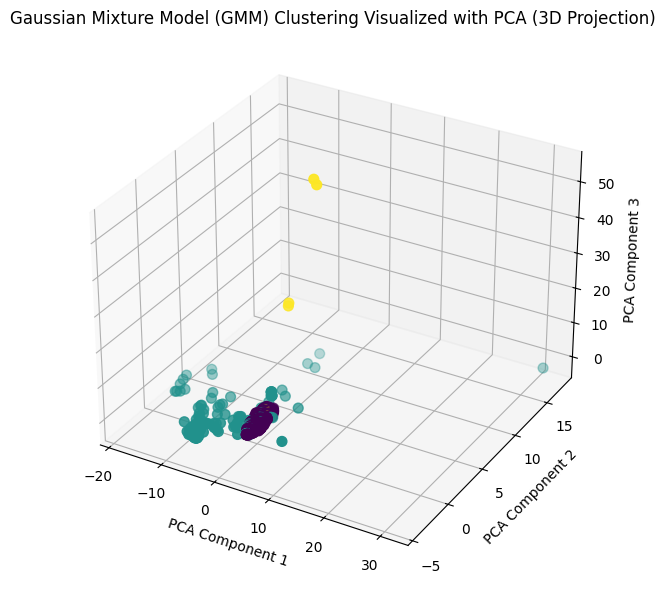

In [45]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ÿßÿ¨ÿ±ÿß€å ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ÿ®ÿß ŸÖÿØŸÑ ŸÖÿÆŸÑŸàÿ∑ ⁄ØÿßŸàÿ≥€å ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)  # ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ŸÇÿßÿ®ŸÑ ÿ™ŸÜÿ∏€åŸÖ ÿßÿ≥ÿ™
gmm_labels = gmm.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ≥Ÿá ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å GMM ÿØÿ± ŸÅÿ∂ÿß€å ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=gmm_labels,
    cmap='viridis',
    s=50
)

ax.set_title('Gaussian Mixture Model (GMM) Clustering Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



In [46]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# ŸÖÿ≠ÿØŸàÿØŸá‚Äåÿß€å ÿßÿ≤ ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿ¢ÿ≤ŸÖŸàŸÜ
cluster_range = range(2, 10)

# ÿ∞ÿÆ€åÿ±Ÿá ÿßŸÖÿ™€åÿßÿ≤Ÿáÿß ÿ®ÿ±ÿß€å ŸÖŸÇÿß€åÿ≥Ÿá
gmm_scores = []
agglo_scores = []

for k in cluster_range:
    # Gaussian Mixture
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(scaled_df_clean)
    gmm_score = silhouette_score(scaled_df_clean, gmm_labels)
    gmm_scores.append(gmm_score)

    # Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglo_labels = agglo.fit_predict(scaled_df_clean)
    agglo_score = silhouette_score(scaled_df_clean, agglo_labels)
    agglo_scores.append(agglo_score)

# ŸÜŸÖÿß€åÿ¥ ÿ®Ÿáÿ™ÿ±€åŸÜ ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß
best_k_gmm = cluster_range[np.argmax(gmm_scores)]
best_k_agglo = cluster_range[np.argmax(agglo_scores)]

print(f"Best GMM n_components: {best_k_gmm} with silhouette score: {max(gmm_scores):.4f}")
print(f"Best Agglomerative n_clusters: {best_k_agglo} with silhouette score: {max(agglo_scores):.4f}")



Best GMM n_components: 2 with silhouette score: 0.7399
Best Agglomerative n_clusters: 3 with silhouette score: 0.7791


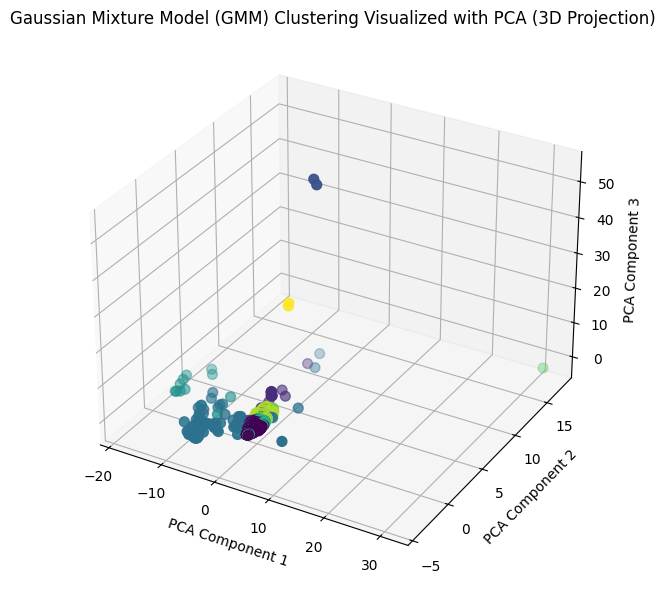

In [47]:
# ÿßÿ¨ÿ±ÿß€å Isolation Forest ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
iso_forest = IsolationForest(contamination=0.01, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean)

# ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®Ÿá ÿ≥Ÿá ŸÖÿ§ŸÑŸÅŸá ÿßÿµŸÑ€å ÿ®ÿß PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# ÿ±ÿ≥ŸÖ ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß ÿ±ŸÜ⁄Ø‚Äåÿ®ŸÜÿØ€å ÿ®ÿ± ÿßÿ≥ÿßÿ≥ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß€å GMM ÿØÿ± ŸÅÿ∂ÿß€å ÿ≥Ÿá‚Äåÿ®ÿπÿØ€å
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=gmm_labels,
    cmap='viridis',
    s=50
)

ax.set_title('Gaussian Mixture Model (GMM) Clustering Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



In [48]:
# Re-run Isolation Forest to add 'anomaly_label' column
iso_forest = IsolationForest(contamination=0.01, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean)

scaled_df_clean['anomaly_label'] = labels

# ÿ¥ŸÖÿßÿ±ÿ¥ ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ Ÿà ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
counts = scaled_df_clean['anomaly_label'].value_counts()

# ŸÜŸÖÿß€åÿ¥ ŸÜÿ™ÿß€åÿ¨
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ (label = 1):", counts.get(1, 0))
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ (label = -1):", counts.get(-1, 0))

ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ (label = 1): 7134
ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ (label = -1): 73


In [49]:
# ŸÅÿ±ÿ∂ ÿ®ÿ± ÿß€åŸÜ ÿßÿ≥ÿ™ ⁄©Ÿá original_df ÿ¥ÿßŸÖŸÑ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸÇÿ®ŸÑ ÿßÿ≤ ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿßÿ≥ÿ™
# Ÿà ÿß€åŸÜÿØ⁄©ÿ≥ ÿ¢ŸÜ ÿ®ÿß scaled_df_clean ŸáŸÖ‚Äåÿ±ÿßÿ≥ÿ™ÿß ÿßÿ≥ÿ™

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å
df1['anomaly_label'] = scaled_df_clean['anomaly_label']

# ÿßŸÜÿ™ÿÆÿßÿ® €±€∞ ŸÜŸÖŸàŸÜŸá ÿ™ÿµÿßÿØŸÅ€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß
sample_df = df1[['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287','anomaly_label']].sample(n=10, random_state=42)

# ŸÜŸÖÿß€åÿ¥ ŸÜÿ™ÿß€åÿ¨
print("ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å:")
print(sample_df)


ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿµŸÑ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å:
      AssetID_8341  AssetID_8342  AssetID_8343  AssetID_8344  AssetID_8346  \
3813          0.14          11.8          65.0        -240.0           7.9   
828           0.30          12.2          61.0        -200.0           7.7   
2112          0.20          12.4          65.0        -250.0           7.6   
6833          0.06          12.0          69.0        -230.0           6.9   
2022          0.23          12.4          59.0        -240.0           7.7   
4374          0.16          12.0          65.5        -240.0           8.0   
5267          0.16          12.3          69.0        -250.0           6.8   
2758          0.08          12.1          65.0        -240.0           7.6   
468            NaN          12.2           NaN        -200.0           NaN   
5865          0.26          11.9          68.0        -220.0           6.8   

      AssetID_9286  AssetID_9287  anomaly_labe

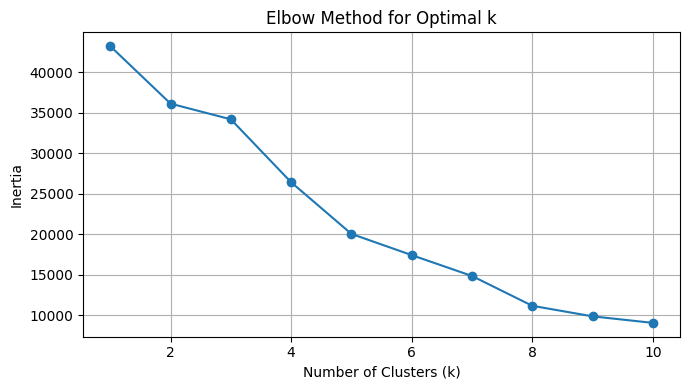

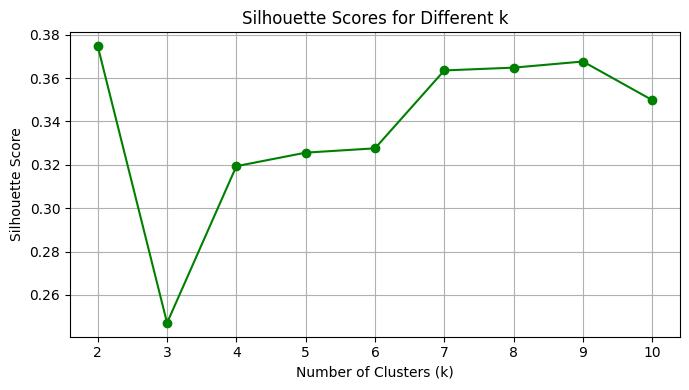

In [50]:
X = scaled_df_clean[['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287']]

# Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Silhouette Scores
silhouette_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7, 4))
plt.plot(k_range_sil, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
# ÿßÿ¨ÿ±ÿß€å Isolation Forest ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
iso_forest = IsolationForest(contamination=0.010, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean[['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287']])

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®ÿ±⁄Üÿ≥ÿ® ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿ≥ÿ™ÿßŸÜÿØÿßÿ±ÿØÿ¥ÿØŸá
scaled_df_clean['anomaly_label'] = labels
scaled_df_clean['anomaly_status'] = scaled_df_clean['anomaly_label'].map({1: 'normal', -1: 'abnormal'})

# ÿßŸÜÿ™ŸÇÿßŸÑ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å (ŸÖŸÇÿßÿØ€åÿ± ŸàÿßŸÇÿπ€å)
df1['anomaly_status'] = scaled_df_clean['anomaly_status']

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ Ÿà ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ
status_counts = df1['anomaly_status'].value_counts()
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ:", status_counts.get('normal', 0))
print("ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ:", status_counts.get('abnormal', 0))

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ≠ÿØÿßŸÇŸÑ €≤ ŸÖŸàÿ±ÿØ abnormal Ÿà €∏ ŸÖŸàÿ±ÿØ normal
abnormal_samples = df1[df1['anomaly_status'] == 'abnormal'][['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287', 'anomaly_status']].sample(n=2, random_state=42)
normal_samples = df1[df1['anomaly_status'] == 'normal'][['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287', 'anomaly_status']].sample(n=8, random_state=24)

# ÿ™ÿ±⁄©€åÿ® Ÿà ŸÜŸÖÿß€åÿ¥ €±€∞ ŸÜŸÖŸàŸÜŸá
final_samples = pd.concat([abnormal_samples, normal_samples]).reset_index(drop=True)
print("\nŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å (ÿ≠ÿØÿßŸÇŸÑ ÿØŸà ŸÖŸàÿ±ÿØ abnormal):")
print(final_samples)


ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ŸÜÿ±ŸÖÿßŸÑ: 7135
ÿ™ÿπÿØÿßÿØ ŸÖŸàÿßÿ±ÿØ ÿ∫€åÿ±ŸÜÿ±ŸÖÿßŸÑ: 72

ŸÜŸÖŸàŸÜŸá‚Äåÿß€å ÿßÿ≤ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸàÿßŸÇÿπ€å ŸáŸÖÿ±ÿßŸá ÿ®ÿß Ÿàÿ∂ÿπ€åÿ™ ŸÜÿßŸáŸÜÿ¨ÿßÿ±€å (ÿ≠ÿØÿßŸÇŸÑ ÿØŸà ŸÖŸàÿ±ÿØ abnormal):
   AssetID_8341  AssetID_8342  AssetID_8343  AssetID_8344  AssetID_8346  \
0          0.12          11.6          47.0        -260.0           0.0   
1          0.38           0.0          31.0        -180.0           0.0   
2          0.30          12.0          67.0        -205.0           7.8   
3          0.16          12.4          64.0        -200.0           7.7   
4          0.12          11.9          67.0        -195.0           7.7   
5          0.29          12.0          68.0        -220.0           7.0   
6          0.13          11.9          68.0        -240.0           6.9   
7          0.25          12.0          69.0        -205.0           7.7   
8          0.10          11.8          74.5        -220.0           6.8   
9          0.13          11.8     